# Problem Statement- to establish relationship between mpg and other attributes

In [1]:
### import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
df=pd.read_csv('auto-mpg.csv')

In [4]:
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
378,38.0,4,105.0,63,2125,14.7,82,1,plymouth horizon miser
245,36.1,4,98.0,66,1800,14.4,78,1,ford fiesta
36,19.0,6,250.0,88,3302,15.5,71,1,ford torino 500
239,30.0,4,97.0,67,1985,16.4,77,3,subaru dl
283,20.2,6,232.0,90,3265,18.2,79,1,amc concord dl 6
191,22.0,6,225.0,100,3233,15.4,76,1,plymouth valiant
255,25.1,4,140.0,88,2720,15.4,78,1,ford fairmont (man)
359,28.1,4,141.0,80,3230,20.4,81,2,peugeot 505s turbo diesel
153,18.0,6,250.0,105,3459,16.0,75,1,chevrolet nova
56,26.0,4,91.0,70,1955,20.5,71,1,plymouth cricket


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [9]:
df['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
70     12
67     12
65     10
97      9
85      9
80      7
145     7
140     7
92      6
68      6
78      6
84      6
?       6
72      6
180     5
71      5
86      5
115     5
130     5
60      5
170     5
175     5
83      4
120     4
76      4
165     4
52      4
190     3
125     3
215     3
48      3
63      3
112     3
225     3
96      3
69      3
74      3
129     2
98      2
198     2
53      2
81      2
79      2
153     2
58      2
62      2
87      2
46      2
160     2
155     2
139     2
66      1
149     1
132     1
64      1
116     1
77      1
89      1
142     1
135     1
138     1
133     1
103     1
107     1
108     1
102     1
220     1
113     1
200     1
210     1
193     1
54      1
208     1
137     1
158     1
167     1
94      1
230     1
49      1
91      1
122     1
61      1
93      1
148     1
152     1
82      1
Name: horsepower, dtype: int64

In [10]:
df.shape

(398, 9)

In [ ]:
### droping car name

In [11]:
df=df.drop("car name",axis=1)

In [12]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
97,18.0,6,225.0,105,3121,16.5,73,1


In [13]:
#### replace origin with usa europe and asia

In [14]:
df['origin']=df['origin'].replace({1:'USA',2:'EUROPE',3:'ASIA'})

In [15]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
170,23.0,4,140.0,78,2592,18.5,75,USA


In [16]:
### change the datatype from object to float

In [17]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [18]:
median1=df['horsepower'].median()
median1

93.5

In [19]:
df['horsepower']=df['horsepower'].replace(np.nan,median1)

In [20]:
df['horsepower']=df['horsepower'].astype(float)

In [21]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [22]:
#### replace origin datatypes from object to float or int

In [23]:
df=pd.get_dummies(df,columns=['origin'])

In [24]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_ASIA,origin_EUROPE,origin_USA
292,18.5,8,360.0,150.0,3940,13.0,79,0,0,1


In [25]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin_ASIA        uint8
origin_EUROPE      uint8
origin_USA         uint8
dtype: object

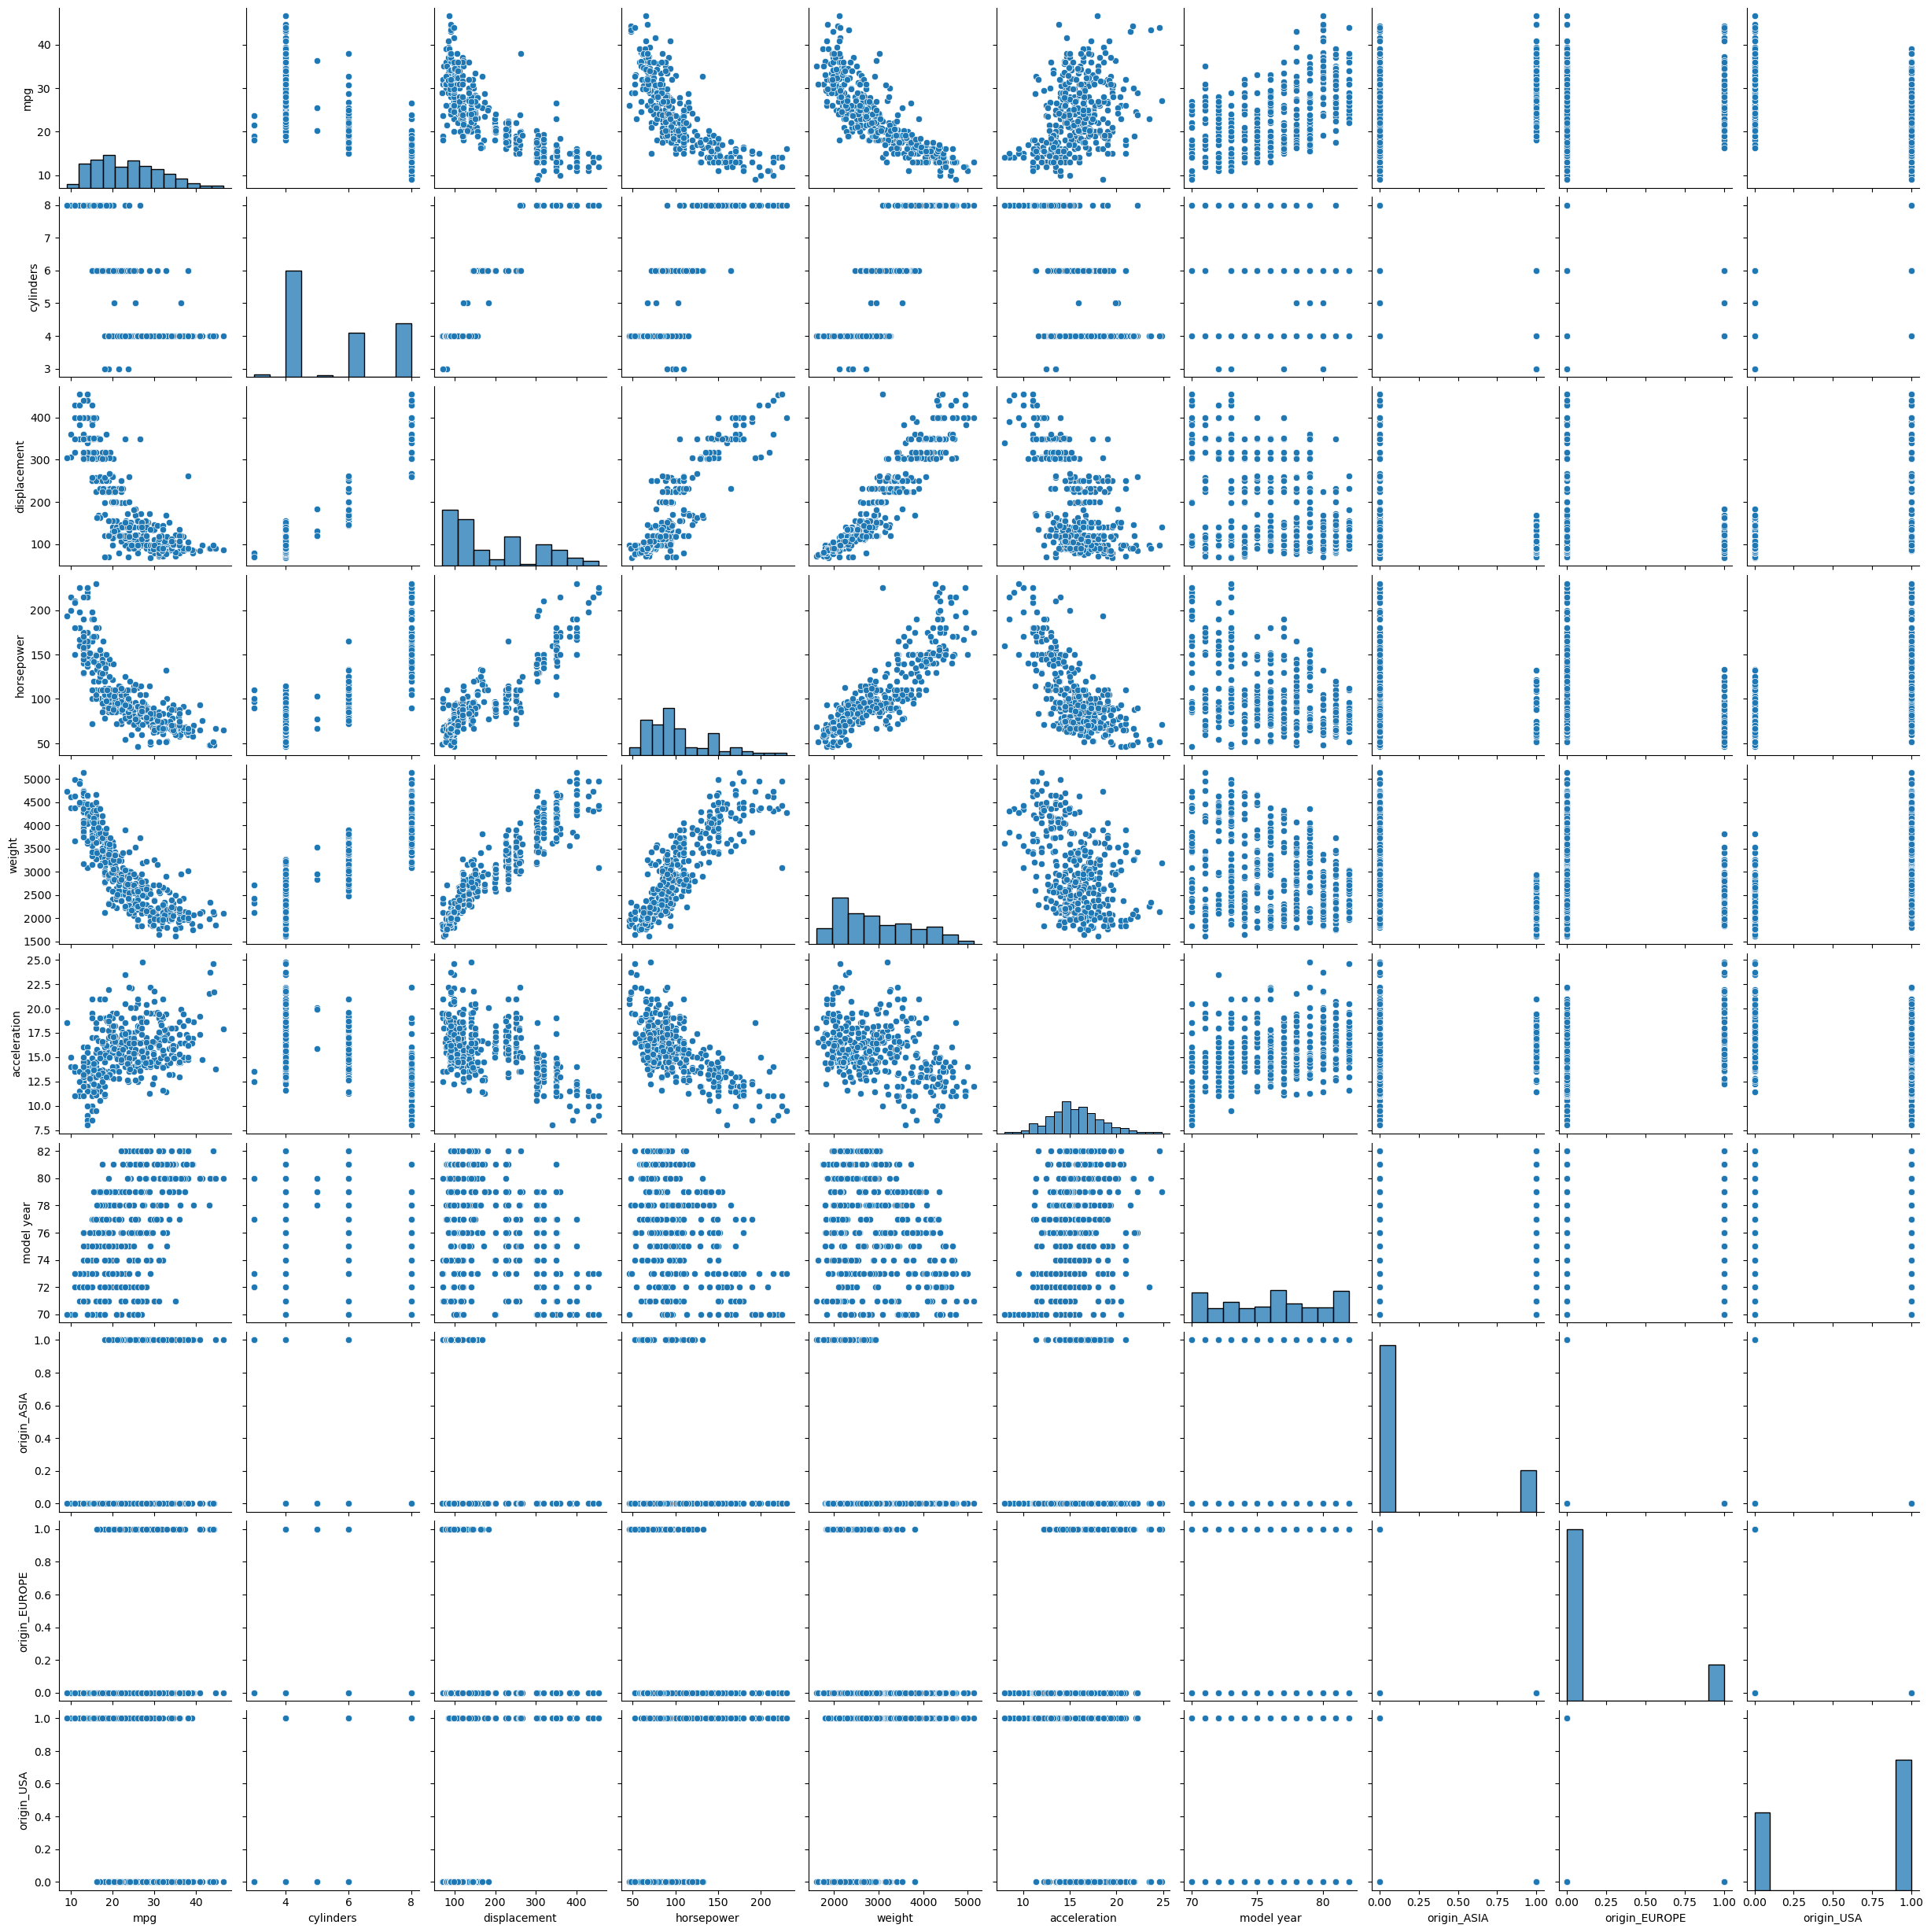

In [26]:
sns.pairplot(df)

In [27]:
### split_dat
Y=df['mpg']
X=df.drop(["mpg"],axis=1)

In [28]:
# split into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [30]:
### Fit linear Model
model1=LinearRegression()

In [31]:
model1.fit(X_train,Y_train)

LinearRegression()

In [32]:
model1.score(X_train,Y_train)

0.814102550161056

In [33]:
model1.score(X_test,Y_test)

0.8433135132808829